In [ ]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam



In [ ]:
import numpy as np

In [ ]:
from google.colab  import files
uploaded = files.upload()

Saving forestfires.csv to forestfires (1).csv


In [ ]:
import pandas as pd
import io
  
fire = pd.read_csv(io.BytesIO(uploaded["forestfires.csv"]))



In [ ]:
fire.drop('month',
  axis='columns', inplace=True)

In [ ]:
fire.drop('day',
  axis='columns', inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
fire.iloc[:, -1] = labelencoder.fit_transform(fire.iloc[:,-1])

In [ ]:
fire.head(5)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


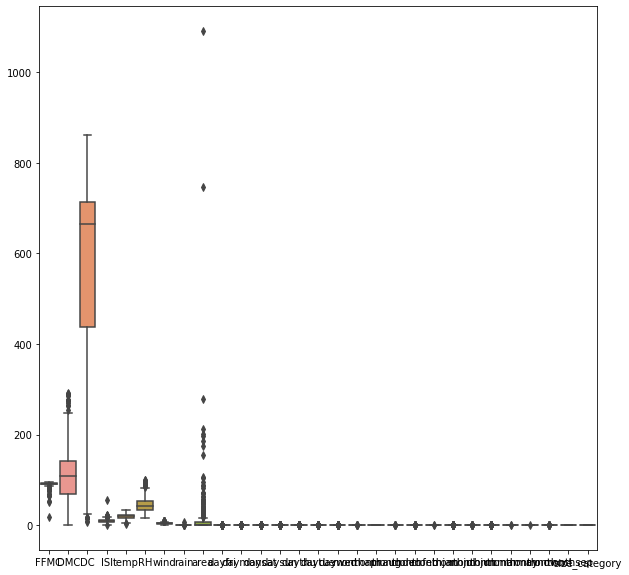

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(10,10)
sns.boxplot(data=fire)

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <a list of 10 Patch objects>)

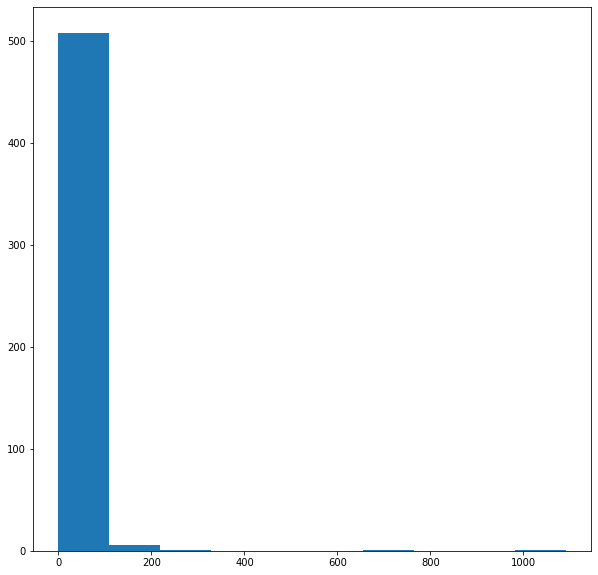

In [ ]:
import matplotlib.pyplot as plt

plt.hist(fire["area"])

In [ ]:
X=fire.drop('size_category',axis=1)

In [ ]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y=fire['size_category']

In [ ]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [ ]:
import matplotlib.pyplot as plt



from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

import numpy

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [ ]:
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, Y)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    score = explained_variance_score(Y, predictions)
    mae = mean_absolute_error(predictions, Y)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

LiR: 0.157165 (0.340527)
Ridge: 0.156185 (0.342755)
Lasso: 0.095663 (0.367204)
ElasticNet: 0.096608 (0.365902)
Bag_Re: 0.998918 (0.000967)
RandomForest: 0.998721 (0.001122)
ExtraTreesRegressor: 1.000000 (0.000000)
KNN: 0.559061 (0.175242)
CART: 1.000000 (0.000000)
SVM: 0.268158 (0.266582)


'ExtraTreesRegressor' and 'DecisionTreeRegressor' are the best estimators/models for this dataset, followed by 'BaggingRegressor', ey can be further explored and their hyperparameters tuned

In [ ]:

fire["class"]=np.where(fire["area"]<200, 0, 1)

In [ ]:
fire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,class
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:

xn=fire.drop('class',axis=1)
yn=fire['size_category']


In [ ]:
xn.shape

(517, 29)

In [ ]:
from numpy import asarray
from sklearn.datasets import make_regression
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing


# get the model
def get_model(xn,yn):
  model = Sequential()
  model.add(Dense(20, input_dim=29, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(1, kernel_initializer='he_uniform'))
  model.compile(loss='mae', optimizer='adam',metrics=['accuracy'])
  return model

# load dataset

# get model
model = get_model(29,1)
# fit the model on all data



In [ ]:

trainhist=model.fit(xn, yn, validation_split=0.33,epochs=150, batch_size=10,verbose=1)

Epoch 1/150
35/35 [==============================] - 1s 9ms/step - loss: 113.7352 - accuracy: 0.7594 - val_loss: 10.0657 - val_accuracy: 0.6316
Epoch 2/150
35/35 [==============================] - 0s 3ms/step - loss: 14.6528 - accuracy: 0.4609 - val_loss: 9.1847 - val_accuracy: 0.5205
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 11.1443 - accuracy: 0.5313 - val_loss: 7.1656 - val_accuracy: 0.5731
Epoch 4/150
35/35 [==============================] - 0s 3ms/step - loss: 6.8332 - accuracy: 0.5292 - val_loss: 5.2817 - val_accuracy: 0.5906
Epoch 5/150
35/35 [==============================] - 0s 3ms/step - loss: 5.3766 - accuracy: 0.6097 - val_loss: 3.5996 - val_accuracy: 0.5673
Epoch 6/150
35/35 [==============================] - 0s 3ms/step - loss: 3.0875 - accuracy: 0.5792 - val_loss: 3.1466 - val_accuracy: 0.5439
Epoch 7/150
35/35 [==============================] - 0s 3ms/step - loss: 2.7128 - accuracy: 0.4898 - val_loss: 2.7800 - val_accuracy: 0.5673
Epoch 8/

In [ ]:
# evaluate the model
scores = model.evaluate(xn, yn)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.2083 - accuracy: 0.9652
accuracy: 96.52%


In [ ]:
 #Visualize training history

# list all data in history
trainhist.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt

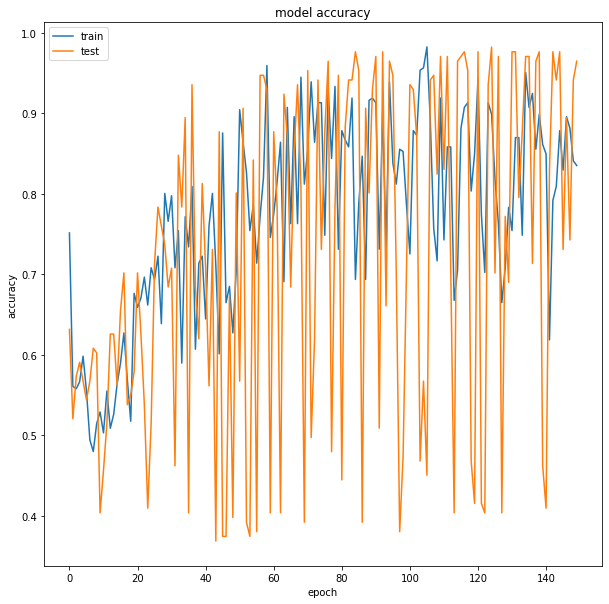

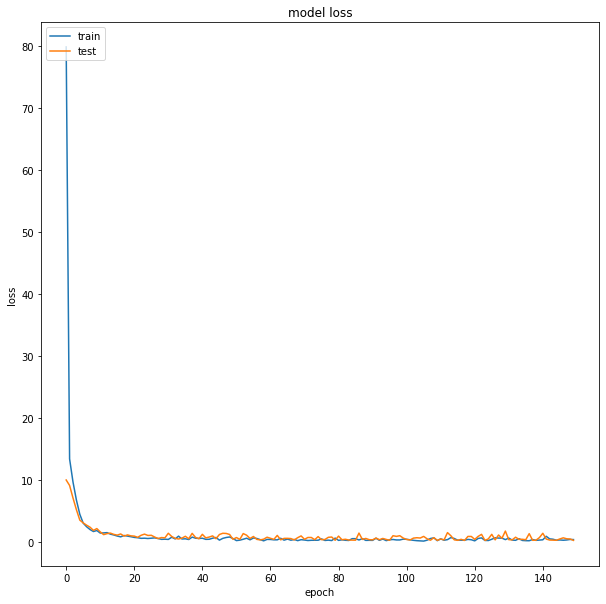

In [ ]:
# summarize history for accuracy
plt.plot(trainhist.history['accuracy'])
plt.plot(trainhist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(trainhist.history['loss'])
plt.plot(trainhist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#Hypertuning the nueral network

In [ ]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardization
a = StandardScaler()
a.fit(xn)
X_standardized = a.transform(xn)

#Tuning of Hyperparameters :- Batch Size and Epochs

In [ ]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [ ]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=29,kernel_initializer='uniform', activation='softmax'))
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mae', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,20,50]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result =grid.fit(X_standardized,yn)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=1.000, total=   1.0s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=1.000, total=   1.0s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.981, total=   1.4s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=1.000, total=   1.0s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.990, total=   1.0s
[CV] batch_size=10, epochs=20 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=20, score=1.000, total=   1.4s
[CV] batch_size=10, epochs=20 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.9s remaining:    0.0s


[CV] ............ batch_size=10, epochs=20, score=1.000, total=   1.3s
[CV] batch_size=10, epochs=20 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=20, score=1.000, total=   1.4s
[CV] batch_size=10, epochs=20 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.6s remaining:    0.0s


[CV] ............ batch_size=10, epochs=20, score=1.000, total=   1.4s
[CV] batch_size=10, epochs=20 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   11.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=20, score=0.971, total=   1.4s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=1.000, total=   2.6s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.990, total=   2.5s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=1.000, total=   2.5s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=1.000, total=   2.5s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.981, total=   2.5s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=1.000, total=   1.2s
[CV] batch_size=20, epochs=10 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   56.6s finished


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.994193434715271, using {'batch_size': 10, 'epochs': 50}
0.9941747546195984,0.007766988873490327 with: {'batch_size': 10, 'epochs': 10}
0.9941747546195984,0.011650490760803224 with: {'batch_size': 10, 'epochs': 20}
0.994193434715271,0.0077577331105491 with: {'batch_size': 10, 'epochs': 50}
0.9747572779655457,0.029829693181535385 with: {'batch_size': 20, 'epochs': 10}
0.978659451007843,0.029068932578387992 with: {'batch_size': 20, 'epochs': 20}
0.9941747546195984,0.007766988873490327 with: {'batch_size': 20, 'epochs': 50}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 10}
0.9766990303993225,0.031067964434625863 with: {'batch_size': 40, 'epochs': 20}
0.9805825233459473,0.03008143009956354 with: {'batch_size': 40, 'epochs': 50}


Tuning of Hyperparameters:- Learning rate and Drop out rate

In [ ]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 29,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim =29 ,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mae',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01]
dropout_rate = [0.0,0.1]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,yn)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dropout_rate=0.0, learning_rate=0.001, score=1.000, total=   0.8s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.750, total=   0.8s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.524, total=   0.8s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.680, total=   0.8s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.728, total=   0.8s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=1.000, total=   1.2s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.1s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.990, total=   0.8s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.9s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.524, total=   0.8s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.7s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=1.000, total=   0.8s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.5s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.961, total=   0.8s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=1.000, total=   0.8s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=0.750, total=   0.7s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=0.534, total=   0.8s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=0.835, total=   0.7s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=0.728, total=   0.7s
[CV] dropout_rate=0.1, learning_rate=0.01 ............................
[CV]  dropout_rate=0.1, learning_rate=0.01, score=1.000, total=   0.7s
[CV] dropout_rate=0.1, learning_rate=0.01 ............................
[

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   16.2s finished


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9748879671096802, using {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7364077568054199,0.15359763543603858 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.8951643109321594,0.18599208321714608 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7694174766540527,0.15163978805810893 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9748879671096802,0.024794883021666995 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}


Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [ ]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 29,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 29,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'mae',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,yn)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation_function=softmax, init=uniform, score=1.000, total=   0.8s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.750, total=   1.2s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.524, total=   0.8s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.680, total=   0.8s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.699, total=   0.8s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.4s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=1.000, total=   0.8s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.2s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.250, total=   0.8s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.0s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.524, total=   0.8s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.7s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.320, total=   0.8s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.5s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.699, total=   0.8s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=1.000, total=   0.8s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.750, total=   0.8s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.524, total=   1.2s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.680, total=   0.8s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.699, total=   0.8s
[CV] activation_function=relu, init=uniform ..........................
[CV]  activation_function=relu, init=uniform, score=1.000, total=   0.8s
[CV] activation_function=relu, init=uniform .................

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   48.8s finished


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7305825233459473, using {'neuron1': 4, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 8}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 8, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 8, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 8, 'neuron2': 8}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 16, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 16, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 16, 'neuron2': 8}


Tuning of Hyperparameter :-Number of Neurons in activation layer

In [ ]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 29,kernel_initializer = 'zero',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'zero',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'softmax'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'mae',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,yn)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ neuron1=4, neuron2=2, score=1.000, total=   0.8s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.750, total=   0.8s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.524, total=   0.8s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.680, total=   0.8s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.699, total=   0.8s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=1.000, total=   0.8s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.9s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.750, total=   0.8s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.7s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.524, total=   0.8s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.5s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.680, total=   1.2s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.7s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.699, total=   0.8s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=1.000, total=   0.8s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.750, total=   0.8s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.524, total=   0.8s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.680, total=   0.8s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.699, total=   0.8s
[CV] neuron1=8, neuron2=2 ............................................
[CV] ................ neuron1=8, neuron2=2, score=1.000, total=   0.8s
[CV] neuron1=8, neuron2=2 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   37.3s finished


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7305825233459473, using {'neuron1': 4, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 8}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 8, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 8, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 8, 'neuron2': 8}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 16, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 16, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 16, 'neuron2': 8}


#### Training model with optimum values of Hyperparameters

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(8,input_dim = 29,kernel_initializer = 'zero',activation = 'softmax'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 29,kernel_initializer ='zero',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'softmax'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss ='mae',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 20)

# Fitting the model

model.fit(xn,yn)

# Predicting using trained model

y_predict = model.predict(xn)

# Printing the metrics
print(accuracy_score(yn,y_predict))

0.7311411992263056


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
fire["actual"]=yn
fire["pred"]=y_predict

In [ ]:
fire


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,class,actual,pred
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
X_train, X_test, y_train, y_test = train_test_split(X_standardized, yn,random_state=0)
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
reg.score(X_train, y_train)

1.0

In [ ]:
y_pred=ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_test, y_test)
reg.score(X_test, y_test)

1.0

Inference:During data  visualization it is seen that, the area ranges between 0-200 , and maximum area lies around 100, hence classified into to catgories under small , large area.The data set with neural network is having a huge variance in testdata and train data depicted in the model accuracy, model loss curve. the backward propagation model accuracy is only 96%,still after hyper tuning the parameters the accuracy is 73%. 

Looking into this, with Extra  Tree regressor, the regressor score is 1, hence  Extra  Tree regressor is good in predicting the burned area of forest  fires when compared to Neural network with accuracy score 
